# Analysis of confout.pdb files

This is to check progress of a certain bead through the simulation to be sure it's not drifting too far in one way. Ideally, you have all beads (or every other) for the entire string so far (so for 200 iterations, a 200 frame simulation)

You use `per_bead_confout.sh` to get the input file for this

In [34]:
import numpy as np
import MDAnalysis as mda
import matplotlib.pyplot as plt
from gate_functions import *

In [35]:
indir = '../confout_files/measure_per_bead'
#traj = 'influx_apo_gate_CV'

#bead = [3, 12]  #outward occluded for influx, efflux
#bead = [7, 8]  # occluded
#bead = [11, 4]  #inward occluded
bead = [12]
influx = mda.Universe('%s/%s.bead_%i.string.pdb' %(indir, 'influx_apo_gate_CV', bead[0]))

#efflux = mda.Universe('%s/%s.bead_%i.string.pdb' %(indir, 'efflux_apo_gate_CV', bead[1]))



/home/semccomas/anaconda3/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "


# Gate COM detection
This is an adaptation of the EC plots in the per_iteration_analysis, but principal is the same

Adding a line of best fit can show if there is a concerning trend in a direction


In [32]:
EC_influx,IC_influx = make_gate_arr(influx, gate_EC = [(30,37), (289,295)], gate_IC = [(136,145), (386,394)])
#EC_efflux,IC_efflux = make_gate_arr(efflux, gate_EC = [(30,37), (289,295)], gate_IC = [(136,145), (386,394)])

returning EC gate, IC gate dists


In [4]:
EC_list = [EC_influx, EC_efflux]
IC_list = [IC_influx, IC_efflux]

gate_dist_over_time(EC_list, IC_list, label_list=["influx","efflux"], color_list = ['green', 'orange'])

NameError: name 'EC_efflux' is not defined

returning EC gate, IC gate dists


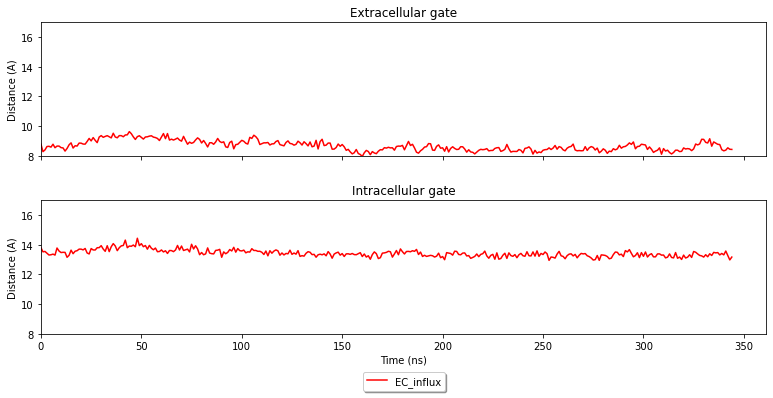

In [36]:
EC_influx,IC_influx = make_gate_arr(influx, gate_EC = [(30,37), (289,295)], gate_IC = [(136,145), (386,394)])


gate_dist_over_time([EC_influx], [IC_influx], label_list = ['EC_influx'], color_list=['red'])

# RMSD of protein
Always good to check

/home/semccomas/anaconda3/lib/python3.8/site-packages/MDAnalysis/coordinates/base.py:865: UserWarning: Reader has no dt information, set to 1.0 ps
  warnings.warn("Reader has no dt information, set to 1.0 ps")


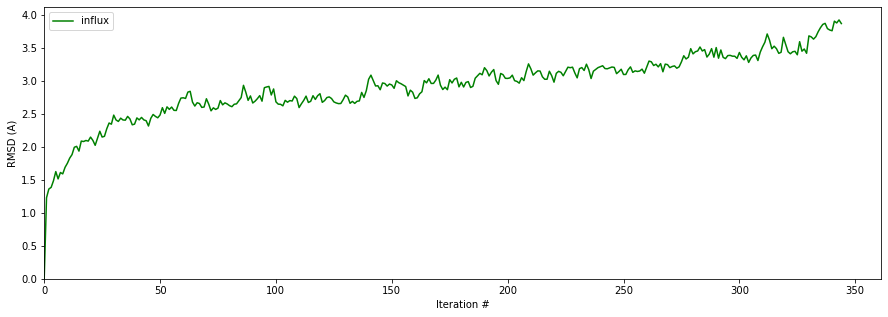

In [37]:
compare_RMSD([influx], label_list=['influx'], color_list = ['green'])

In [38]:
modeldir = '../../../steered/analysis/ref_models'

model_names = ["OUT.equilib.200ns", "OUT-OCC.start", "OCC.start", "IN-OCC.start", "IN.start"]
color_l = ["red", "blue", "green", "orange", "pink"]

model_l = []
for model in model_names:
    model_l.append(mda.Universe(f"{modeldir}/{model}.gro"))

In [39]:
in_occ_model = mda.Universe('../../../steered/analysis/ref_models/IN-OCC.start.gro')
in_occ_sim = mda.Universe('../../../steered/analysis/ref_atom_sim/IN-OCC.150ns.gro')

model_l = [in_occ_model, in_occ_sim]
model_names = ['In occ model', 'In occ sim']

In [40]:
import MDAnalysis.analysis.rms
rmsd_l = []

for model in model_l:
    RMSD = MDAnalysis.analysis.rms.RMSD(reference=model.select_atoms("protein"), \
                                        atomgroup = influx.select_atoms("protein"), \
                                        center = True, select="backbone", \
            groupselections=["backbone and (resid 1-205 or resid 265-455)",\
            "backbone and (resid 1-51 or resid 265-300 or resid 118-146 or resid 364-395)",\
                             "resid 30-37 or resid 289-295 or resid 136-145 or resid 386-394"])  

    RMSD.run(0)
    rmsd = RMSD.rmsd.T
    rmsd_l.append(rmsd)

/home/semccomas/anaconda3/lib/python3.8/site-packages/MDAnalysis/coordinates/base.py:865: UserWarning: Reader has no dt information, set to 1.0 ps
  warnings.warn("Reader has no dt information, set to 1.0 ps")


No handles with labels found to put in legend.


Text(0.5, 0, 'Iteration')

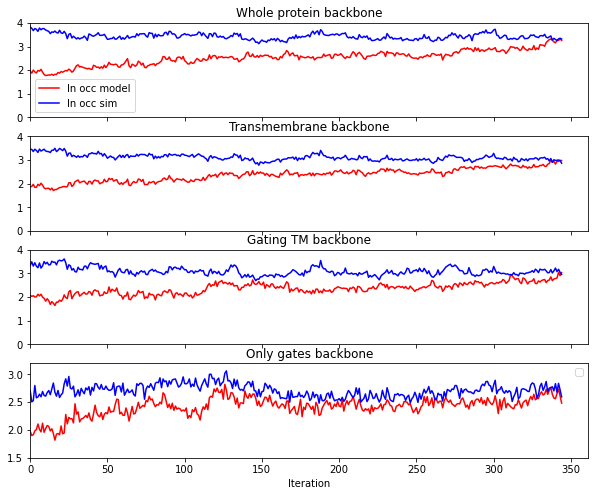

In [43]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, sharex = True, figsize = (10,8))
ylim = (0, 4)
for n, rmsd in enumerate(rmsd_l):
    time = rmsd[1]
    ax1.plot(time, rmsd[2], label = model_names[n], color = color_l[n])
    ax2.plot(time, rmsd[3], color = color_l[n])
    ax3.plot(time, rmsd[4], color = color_l[n])
    ax4.plot(time, rmsd[5], color = color_l[n])
    ax1.legend()

ax1.set_title('Whole protein backbone')
ax2.set_title("Transmembrane backbone")
ax3.set_title("Gating TM backbone")
ax4.set_title("Only gates backbone")
plt.legend()
plt.xlim(0)
ax1.set_ylim(ylim)
ax2.set_ylim(ylim)
ax3.set_ylim(ylim)
ax4.set_ylim(1.5,3.2)

ax4.set_xlabel("Iteration")